In [1]:
# Importing all the essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Importing Stock market data from the Internet

from pandas_datareader import data as pdr
import yfinance as yf

# Fetch stock data for Google (GOOG)
df = yf.download('GOOG', start='2022-01-01', end='2022-12-31')
print(df.head())


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  144.475494  145.550003  143.502502  145.074493  144.719086   
2022-01-04  145.550507  146.610001  143.816147  144.416504  144.062714   
2022-01-05  144.181000  144.298004  137.523499  137.653503  137.316284   
2022-01-06  137.497498  139.686005  136.763504  137.550995  137.214035   
2022-01-07  137.904999  138.254745  135.789001  137.004501  136.668869   

              Volume  
Date                  
2022-01-03  25214000  
2022-01-04  22928000  
2022-01-05  49642000  
2022-01-06  29050000  
2022-01-07  19408000  


In [4]:
# Importing datetime for setting start and end date of the stock market dataset

from datetime import datetime

In [5]:
# Setting the Start and End date for Stock Market Analysis

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
# Importing Google Stock Prices

GOOG = yf.download('GOOG', start=start, end=end)
print(GOOG.head())

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-11  137.380005  138.264008  136.550003  137.740005  137.402573   
2023-09-12  137.130005  137.639999  135.929993  136.070007  135.736664   
2023-09-13  135.899994  137.699997  134.929993  137.500000  137.163162   
2023-09-14  138.389999  139.550003  137.059998  138.990005  138.649506   
2023-09-15  138.800003  139.360001  137.179993  138.300003  137.961197   

              Volume  
Date                  
2023-09-11  17180800  
2023-09-12  15212900  
2023-09-13  16394900  
2023-09-14  19064600  
2023-09-15  48947600  


In [9]:
# Some Basic info about the Google Stock

GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,153.327305,154.881270,151.931518,153.412371,153.089340,2.065863e+07
std,17.809680,17.960434,17.664867,17.762707,17.776901,8.306630e+06
min,124.029999,124.440002,121.459999,123.400002,123.097694,2.459978e+06
25%,138.350006,139.669998,137.449997,138.619995,138.280396,1.595690e+07
50%,149.369995,150.695007,148.009995,148.740005,148.375626,1.860040e+07
75%,168.770004,169.899994,166.389999,168.679993,168.458237,2.276710e+07
max,191.750000,193.309998,190.619995,192.660004,192.406723,5.972800e+07


<Axes: xlabel='Date'>

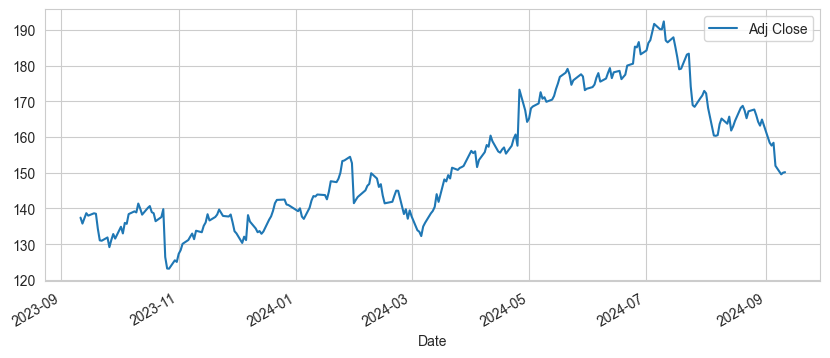

In [10]:
# Plotting Adjusted Closing price for Google Stock

GOOG['Adj Close'].plot(legend=True,figsize=(10,4))

<Axes: xlabel='Date'>

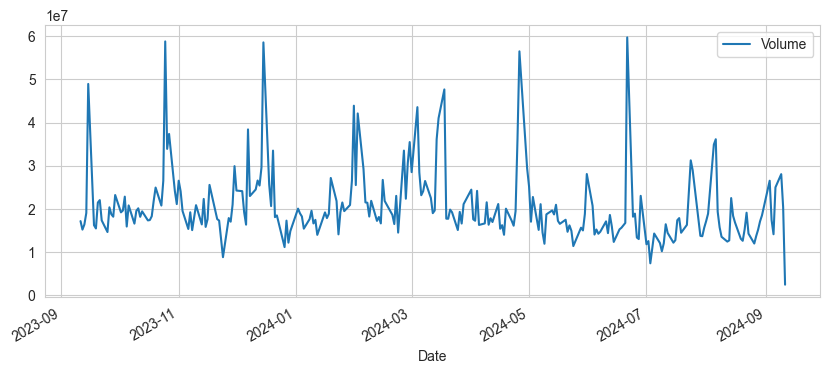

In [11]:
# Total volume of stock being traded each day

GOOG['Volume'].plot(legend=True,figsize=(10,4))

In [12]:
# Calculating Moving average for 10, 20 and 50 days of the stock price

# Define moving average days
ma_day = [10, 20, 50]

# Calculate moving averages
for ma in ma_day:
    column_name = f"MA for {ma} days"
    GOOG[column_name] = GOOG['Adj Close'].rolling(window=ma).mean()

<Axes: xlabel='Date'>

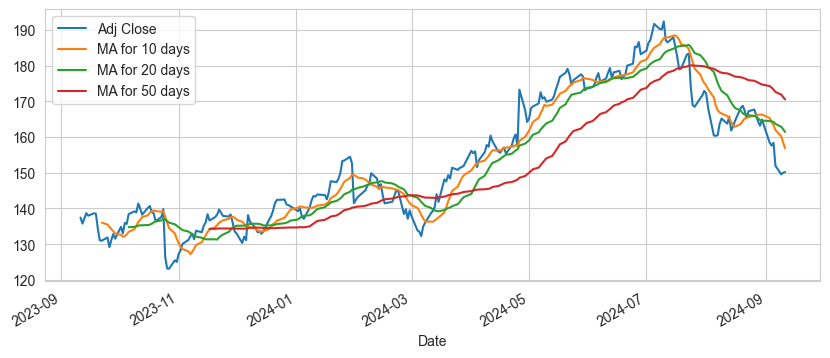

In [13]:
# Plotting the moving averages

GOOG[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

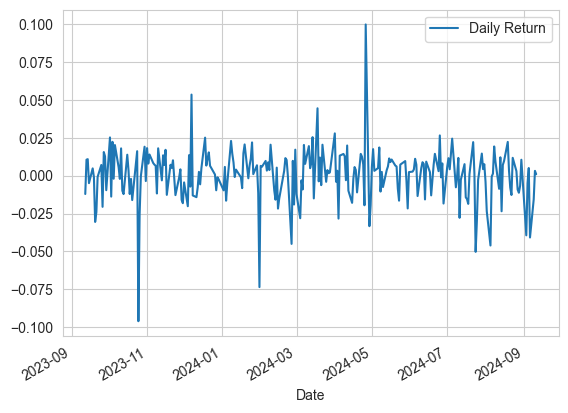

In [14]:
# Plotting Daily returns as a function of Percent change in Adjusted Close value

GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()

GOOG['Daily Return'].plot(legend=True)

C:\Users\princ\AppData\Local\Temp\ipykernel_9692\601460933.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GOOG['Daily Return'].dropna(),bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

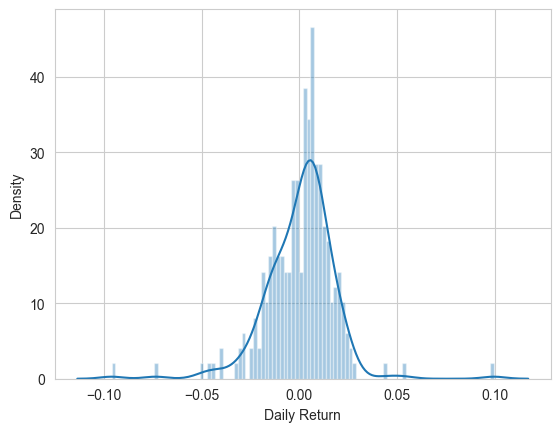

In [15]:
# Plotting the average daily returns of the stock

sns.distplot(GOOG['Daily Return'].dropna(),bins=100)

Text(0, 0.5, 'Risk')

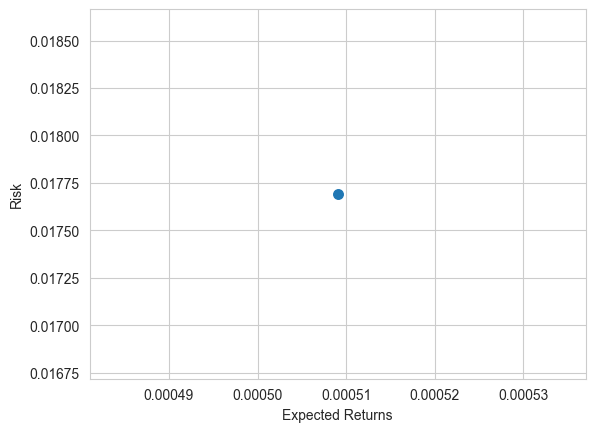

In [16]:
# Risk Analysis --  Comparing the Risk vs Expected returns

rets = GOOG['Daily Return'].dropna()

area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

C:\Users\princ\AppData\Local\Temp\ipykernel_9692\2171498925.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GOOG['Daily Return'].dropna(),bins=100)


<Axes: xlabel='Daily Return', ylabel='Density'>

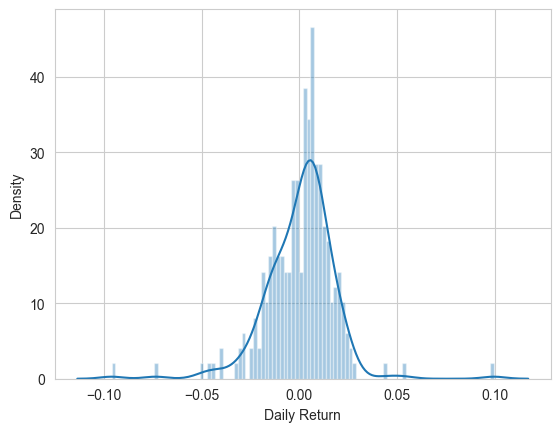

In [17]:
# Visualizing the Value at Risk

sns.distplot(GOOG['Daily Return'].dropna(),bins=100)

In [18]:
# Using Quantiles and the Bootstrap Method to calculate the numerical risk of the stock

GOOG['Daily Return'].quantile(0.05)

-0.026544043072648002

In [19]:
## Monte Carlo Simulation

days = 365

dt = 1/days

mu = rets.mean()

sigma = rets.std()

In [20]:
# Defining the Monte Carlo Simulation Function

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
        
    return price

In [21]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2023-09-11,137.380005,138.264008,136.550003,137.740005,137.402573,17180800,NaN,NaN,NaN,NaN
2023-09-12,137.130005,137.639999,135.929993,136.070007,135.736664,15212900,NaN,NaN,NaN,-0.012124
2023-09-13,135.899994,137.699997,134.929993,137.500000,137.163162,16394900,NaN,NaN,NaN,0.010509
2023-09-14,138.389999,139.550003,137.059998,138.990005,138.649506,19064600,NaN,NaN,NaN,0.010836
2023-09-15,138.800003,139.360001,137.179993,138.300003,137.961197,48947600,NaN,NaN,NaN,-0.004964


Text(0.5, 1.0, 'Monte Carlo Simulation for Google')

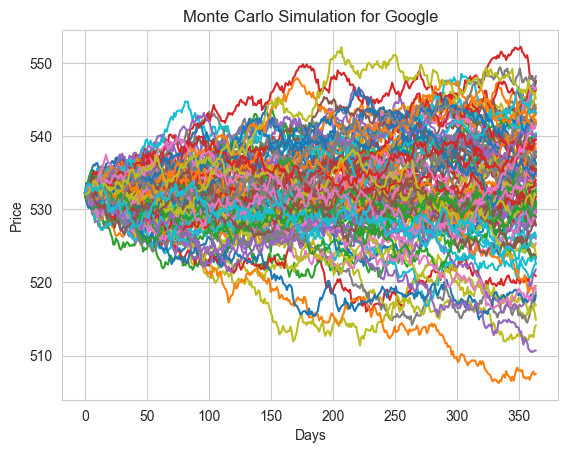

In [22]:
# Running the Monte Carlo simulation a hundred times

start_price = 532.192446

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation for Google')

In [23]:
# Analysing the Monte Carlo Simulation for 10,000 simulations

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
# 1 percent impirical quantile or 99% Confidence Interval

q = np.percentile(simulations,1)

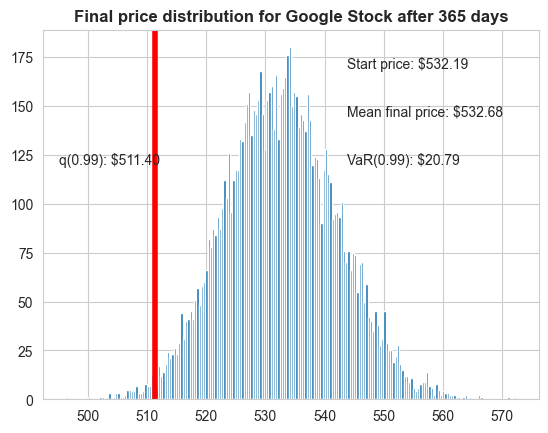

In [24]:
# Plotting the final Risk Analysis plot using Monte Carlo Simulation

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');